In [11]:
import scanpy as sc 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
dataFolder='input_vizgen_liver/mapping/'

ad_spatial=sc.read(dataFolder+'Blank_genes_removed.csv').transpose()
ad_spatial.var_names_make_unique()
print(ad_spatial.shape) 

(395215, 347)


In [5]:
scdatapath='input_vizgen_liver/mapping/countTable_mouseStSt/'
ad_sc=sc.read_h5ad(scdatapath+'sc_liver_data.h5ad')
print(ad_sc)

AnnData object with n_obs × n_vars = 185894 × 31053


In [6]:
def find_index(sp_genename,sc_genename):
    index_sc=[]
    index_sp=[]
    d={}
    for j in range(len(sc_genename)):
        name=sc_genename[j]
        d[name]=j

    for i in range(len(sp_genename)):
        name=sp_genename[i]
        try:
            d[name]
            flag=1
        except KeyError:
            flag=0
        if flag==1:
            index_sc.append(d[name])
            index_sp.append(i)
    return index_sp,index_sc

In [7]:
genename_spatial=ad_spatial.var_names.to_numpy()
genename_sc=ad_sc.var_names.to_numpy()
print(genename_spatial[0:3],genename_sc[0:3])
print(len(genename_spatial),len(genename_sc))

['Comt' 'Ldha' 'Pck1'] ['Xkr4' 'Gm1992' 'Gm37381']
347 31053


In [9]:
index_sp,index_sc=find_index(genename_spatial,genename_sc)

msc=ad_sc[:,index_sc].copy()
msp=ad_spatial[:,index_sp].copy()
gene1=msp.var_names.to_numpy()
gene2=msc.var_names.to_numpy()

print(gene1[0:5],gene2[0:5])

['Comt' 'Ldha' 'Pck1' 'Akr1a1' 'Ugt2b1'] ['Comt' 'Ldha' 'Pck1' 'Akr1a1' 'Ugt2b1']


In [17]:
genesum1=np.sum(msp.X,axis=0)
genemean1=np.mean(msp.X,axis=0)

msc1=msc.X.toarray()
genesum2=np.sum(msc1,axis=0)
genemean2=np.mean(msc1,axis=0)
#print(genesum1)

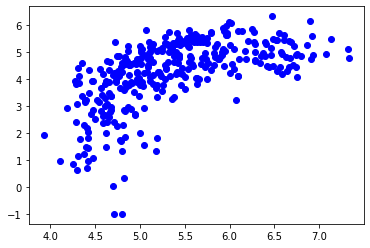

In [21]:
x=np.log10(0.1+genesum1)
y=np.log10(0.1+genesum2)



plt.plot(x,y,'bo')


In [22]:
from scipy.stats import pearsonr

corr,_ = pearsonr(x,y)

print(corr)

0.5898923266353253


0.5524701811399632


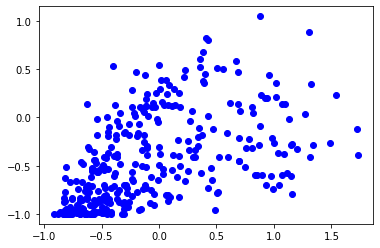

In [23]:
x=np.log10(0.1+genemean1)
y=np.log10(0.1+genemean2)

corr,_ = pearsonr(x,y)
print(corr)

plt.plot(x,y,'bo')